# Homework 8: Dimension Reduction

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'tengdann'

# Download the data:
For this assignment, we will be using a gene expression dataset by Golub et al. (1999).

https://www.kaggle.com/crawford/gene-expression

>This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

A Kaggle user has [shared a kernel using PCA on this dataset](https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification), which, among others, you're free to use as a reference.

**You will need to download the data files from Kaggle to complete this assignment.**

# Part 0: Loading the Data

As usual, load the data and use the summary functions and plots of your choice to get a sense of the data.

In [1]:
import pandas as pd
import numpy as np
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.cluster as skc
import sklearn.preprocessing as skp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# feel free to change the file location 
df_train = pd.read_csv("./data/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("./data/data_set_ALL_AML_independent.csv")

In [4]:
df_train = df_train[[col for col in df_train.columns if "call" not in col]].T
df_test = df_test[[col for col in df_test.columns if "call" not in col]].T

In [4]:
[df_train.shape, df_test.shape]

[(40, 7129), (36, 7129)]

In [5]:
df_train.index

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')

In [6]:
df_test.index

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [8]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


# Part 1: MDS

## 1.1. Visualize the gene expression data in 2D or 3D using Multidimensional Scaling  (10 pts.)

In [5]:
df_train_norm = df_train.copy()
df_train_norm.loc['1':'33'] = skp.scale(df_train_norm.loc['1':'33'].astype(np.float))
df_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.12007,0.280962,1.86347,0.44911,...,0.0745114,-0.81562,-1.75872,-0.0218655,-0.405584,-0.159782,-0.0330461,0.546068,-0.43582,-0.255875
2,-0.167723,1.0374,0.139139,0.876572,0.1146,0.293351,-1.3225,0.370212,0.0237262,-0.182439,...,-0.11664,0.292993,-0.589006,0.0925164,0.0730554,-0.182892,-0.19726,-0.267043,-0.595744,0.499648
3,0.415047,1.35855,-2.4959,1.10088,-0.907912,-1.57701,0.353591,-1.84988,1.30302,-1.56515,...,1.62762,1.52403,0.317849,-0.498816,1.72436,0.565043,2.13071,0.70869,-0.384366,-0.38727


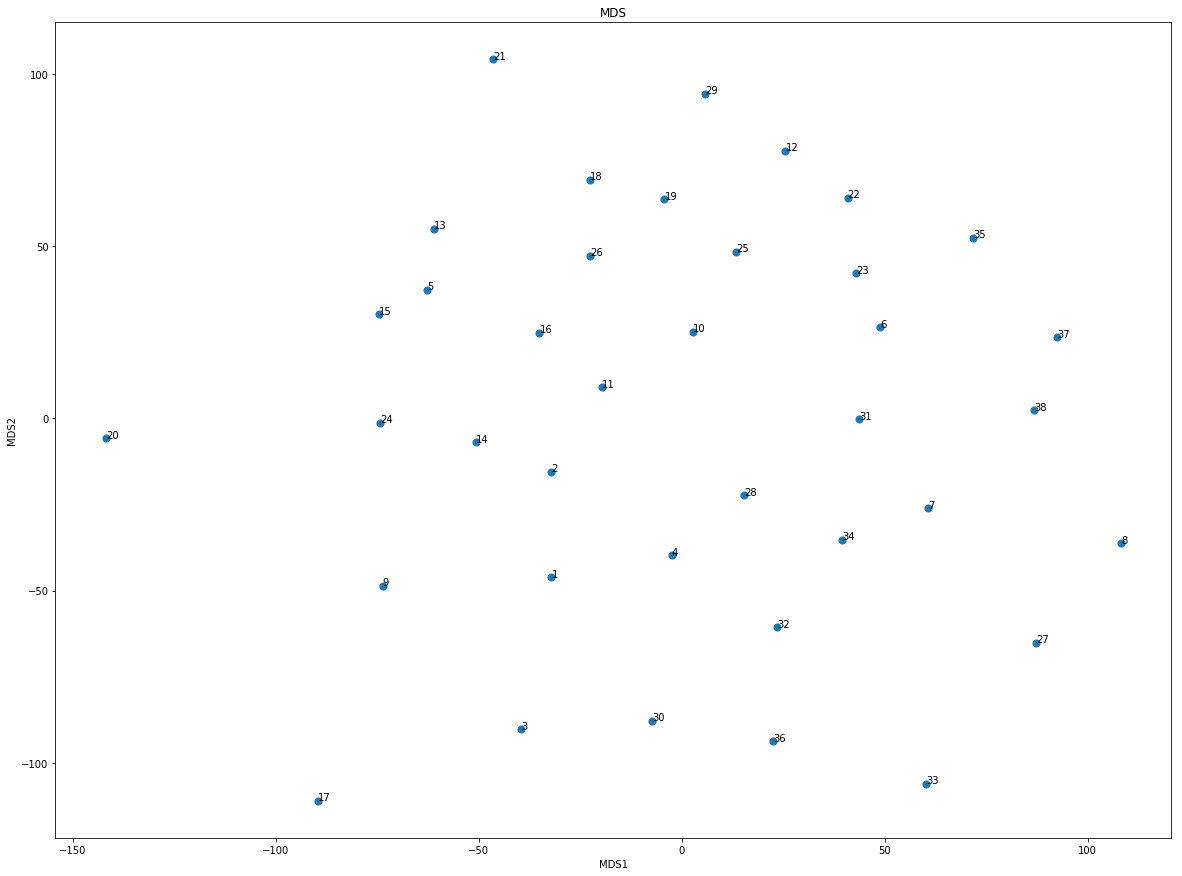

In [23]:
### YOUR CODE HERE ###
X = skm.MDS(n_components=2).fit_transform(df_train_norm.loc['1':'33'])
plt.figure(figsize=(20,15))
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(df_train_norm.loc['1':'33'].index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)

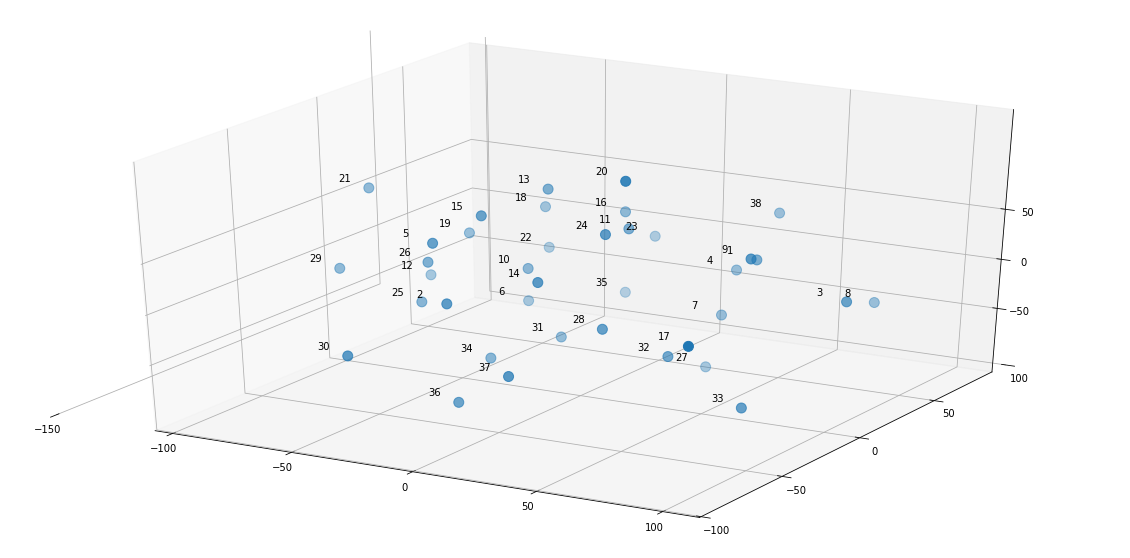

In [13]:
X = skm.MDS(n_components=3).fit_transform(df_train_norm.loc['1':'33'])

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=100)

ax.set_xticks([-150,-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_zticks([-50,0,50])

for i, s in enumerate(df_train_norm.loc['1':'33'].index):
    x, y, _ = proj3d.proj_transform(X[i,0],X[i,1],X[i,2],
                                    ax.get_proj())
    plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=10)

## 1.2. Interprete your results (10 pts.)

What can you see from your visualization(s)?

In 3D space, all the points seem to be relatively clustered closely. However, in 2D space, there a several outliers, and the points appear to be spread farther apart.  

As well, it appears the 2D graph is also a projection of the 3D graph in 2D space. This falls in line with how dimensions work.

# Part 2: PCA

## 2.1. Perform a Principal Component Analysis of the genes in your dataset (10 pts.)

In [7]:
### YOUR CODE HERE ###
pca_model = skd.PCA().fit(df_train_norm.loc['1':'33'])

In [29]:
pca_model.components_.shape

(38, 7129)

## 2.2. How much of the variance does each component explain? (2 pts.)

In [30]:
### YOUR CODE HERE ###
pca_model.explained_variance_

array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])

In [42]:
pca_model.explained_variance_ratio_ * 100

array([1.49877930e+01, 1.19778111e+01, 6.60056806e+00, 4.88492199e+00,
       4.63241532e+00, 3.72196529e+00, 3.49097368e+00, 3.28968370e+00,
       2.98533570e+00, 2.64532179e+00, 2.50955698e+00, 2.35785408e+00,
       2.20532785e+00, 2.08786432e+00, 1.94178295e+00, 1.89340717e+00,
       1.84713718e+00, 1.71329025e+00, 1.70523096e+00, 1.64475646e+00,
       1.53558984e+00, 1.52876881e+00, 1.45609395e+00, 1.43109079e+00,
       1.41521484e+00, 1.37856801e+00, 1.34740603e+00, 1.30587329e+00,
       1.30315682e+00, 1.24908759e+00, 1.15991269e+00, 1.11680809e+00,
       1.03362895e+00, 9.97974912e-01, 9.23972538e-01, 8.59086723e-01,
       8.34768304e-01, 2.95582098e-30])

The component that explains the most variance is component 1. Each subsequent component explains less and less of the variance. Component 1 explains 14.99% of the variance; component 2 explains 11.98% of the variance.

## 2.3. What would be an appropriate number of components to keep? Why? (2 pts.)

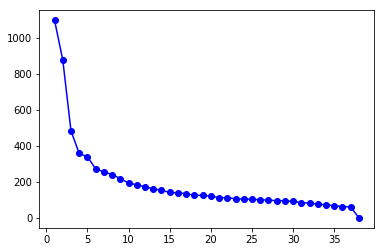

In [32]:
### YOUR CODE HERE ###
plt.plot(range(1,39),pca_model.explained_variance_,'b-o')

It seems the best would be around 5; this is around the point where the graph begins to level out (AKA the 'elbow')

## 2.4 Visualize your data in the reduced component space. What can you see from the visualization? (6 pts.)

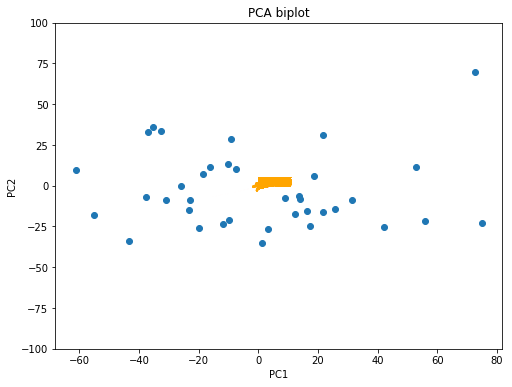

In [9]:
### YOUR CODE HERE ###
X = pca_model.transform(df_train_norm.loc['1':'33'])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
plt.ylim(-100, 100)

# Add variable unit vector projections
V = pca_model.transform(np.identity(7129))
for i, v in enumerate(V):
    plt.annotate(df_train_norm.loc['1':'33'].columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

Here, the dimensional vectors are useless because of the amount of data we have. The points appear to be centered around a PC2 = 0 line. There are several outliers that fall outside this line.

# Part 3: Exploratory Factor Analysis

## 3.1. Create a preliminary factor model and compare it to your PCA results. What are the similarities and differences? (10 pts.)

In [70]:
### YOUR CODE HERE ###
# Create a three-factor model
fa_model = skd.FactorAnalysis(n_components=3) \
              .fit(df_train_norm.loc['1':'33'])

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:3,:].T, 
                   index=df_train.columns,
                   columns=['Factor1', 'Factor2', 'Factor3'])
df_loadings.head()

,Factor1,Factor2,Factor3
0,-0.426975,-0.048115,0.125276
1,-0.216024,-0.149786,0.152321
2,0.068003,-0.080247,0.030520
3,0.294798,0.189667,0.631051
4,-0.646951,0.139251,0.366320


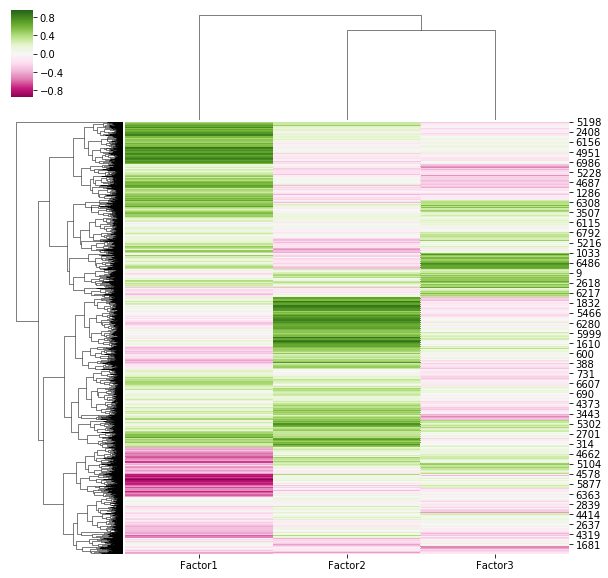

In [71]:
sns.clustermap(df_loadings, cmap=plt.cm.PiYG)

The green bars denote similaries; there are several in all of the factors. In terms of differences, there appears to be a large band of difference in Factor 1.

## 3.2. Create another factor model and compare it to the first. What might the factors represent? (10 pts.)

In [73]:
### YOUR CODE HERE ###
fa_model2 = skd.FactorAnalysis(n_components=4) \
              .fit(df_train_norm.loc['1':'33'])

# Show the loadings
df_loadings2 = pd.DataFrame(fa_model2.components_[:4,:].T, 
                   index=df_train.columns,
                   columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df_loadings2.head()

,Factor1,Factor2,Factor3,Factor4
0,-0.436693,-0.027792,0.129894,-0.502573
1,-0.226305,-0.134720,0.156172,-0.164489
2,0.061877,-0.083450,0.037031,-0.048499
3,0.307199,0.166616,0.633380,-0.023714
4,-0.636111,0.187939,0.359832,0.040231


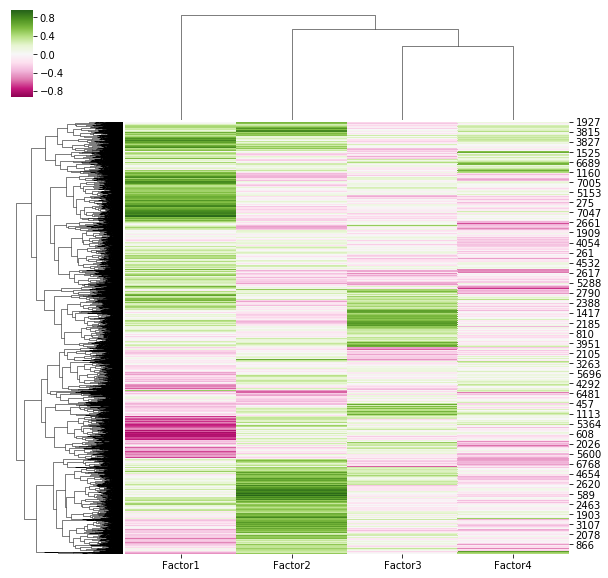

In [74]:
sns.clustermap(df_loadings2, cmap=plt.cm.PiYG)

There are still similarity clusters in all factors; factor 2 appears to have two different bands of similarities. However, factor 4 seems to have no defined similarities or differences. There is still a band of differences that exist in factor 1.

# Part 4: Clustering

## 4.1. Perform a cluster analysis on your data. Visualize the results in 2D or 3D using PCA. (10 pts.)

- Apply dimension reduction on the data (5 pts.)
- Choose your clustering algorithm and tune the parameter (5 pts.)

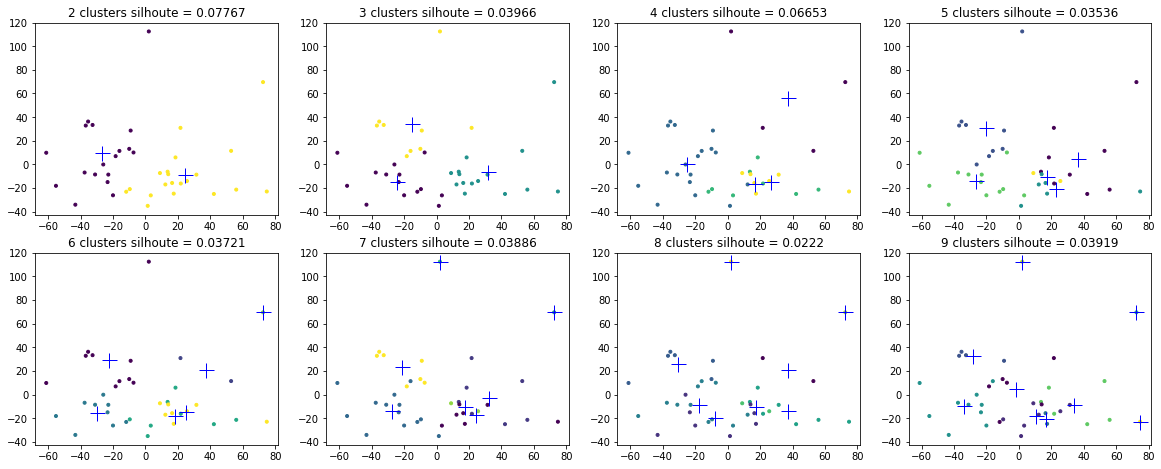

In [10]:
### YOUR CODE HERE ###
pca = PCA(n_components = 3).fit(df_train_norm.loc['1':'33'])
data2d = pca.transform(df_train_norm.loc['1':'33'])

plt.figure(figsize=(20, 12))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(df_train_norm.loc['1':'33'])
    scores.append(kmean.score(df_train_norm.loc['1':'33']))
    n_clusters.append(i)
    pred = kmean.predict(df_train_norm.loc['1':'33'])
    preds.append(pred)
    plt.subplot(3, 4, i - 1)
    plt.title(f"{i} clusters silhoute = {np.round(silhouette_score(df_train_norm.loc['1':'33'], pred), decimals = 5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c = pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

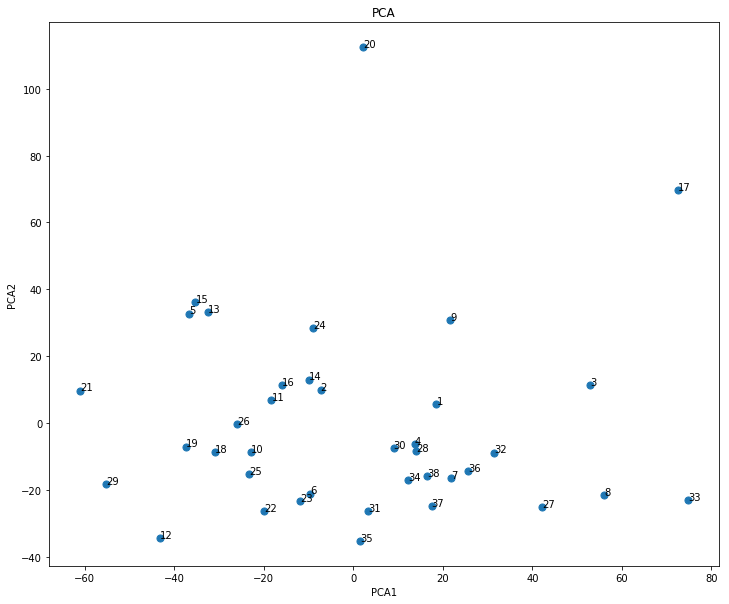

In [19]:
X = skd.PCA(n_components=4).fit_transform(df_train_norm.loc['1':'33'])
plt.figure(figsize=(12,10))
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA')

for i, s in enumerate(df_train_norm.loc['1':'33'].index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)

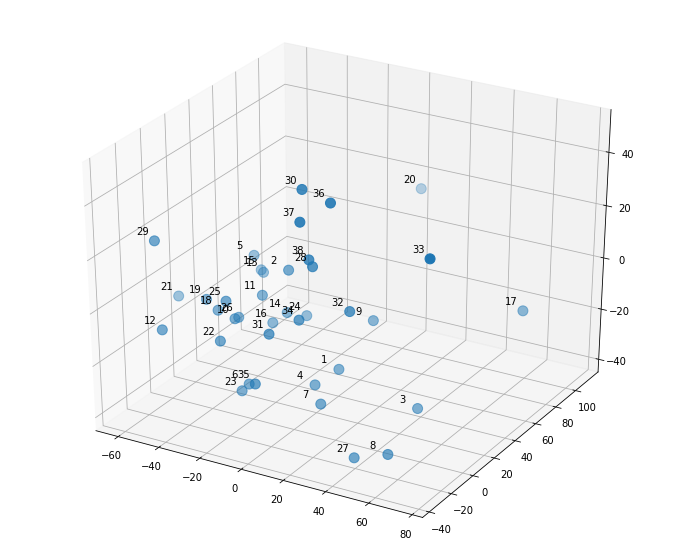

In [18]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=100)

for i, s in enumerate(df_train_norm.loc['1':'33'].index):
    x, y, _ = proj3d.proj_transform(X[i,0],X[i,1],X[i,2],
                                    ax.get_proj())
    plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=10)

Looking at the silhouette plot, it seems that having a k = 4 (4 clusters) is the most optimal amount of clusters. Past that, the silhouette score begins to fall dramatically.  

When one looks at the 2D PCA plot w/ 4 components, there are still 2 outliers that exist, similar to the original PCA model that we made. Similarily, when one looks at the 3D plot, there are many more outliers that appear (up to 6, with another 5 that appear to be slightly separated from the main cluster).

## 4.2. Which clusters can you identify? What does your cluster analysis tell you about the data? (10 pts.)
- Visualize your results with the test data (5 pts.)
- Interprete your results (5 pts.)

In [22]:
df_test_norm = df_test.copy()
df_test_norm.loc['39':'62'] = skp.scale(df_test_norm.loc['39':'62'].astype(np.float))

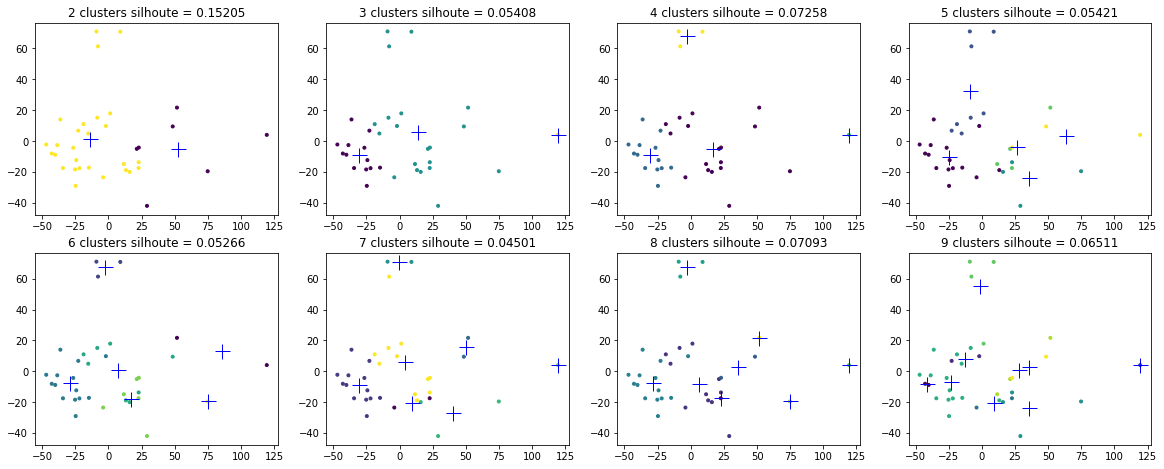

In [24]:
pca = PCA(n_components = 3).fit(df_test_norm.loc['39':'62'])
data2d = pca.transform(df_test_norm.loc['39':'62'])

plt.figure(figsize=(20, 12))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(df_test_norm.loc['39':'62'])
    scores.append(kmean.score(df_test_norm.loc['39':'62']))
    n_clusters.append(i)
    pred = kmean.predict(df_test_norm.loc['39':'62'])
    preds.append(pred)
    plt.subplot(3, 4, i - 1)
    plt.title(f"{i} clusters silhoute = {np.round(silhouette_score(df_test_norm.loc['39':'62'], pred), decimals = 5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c = pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

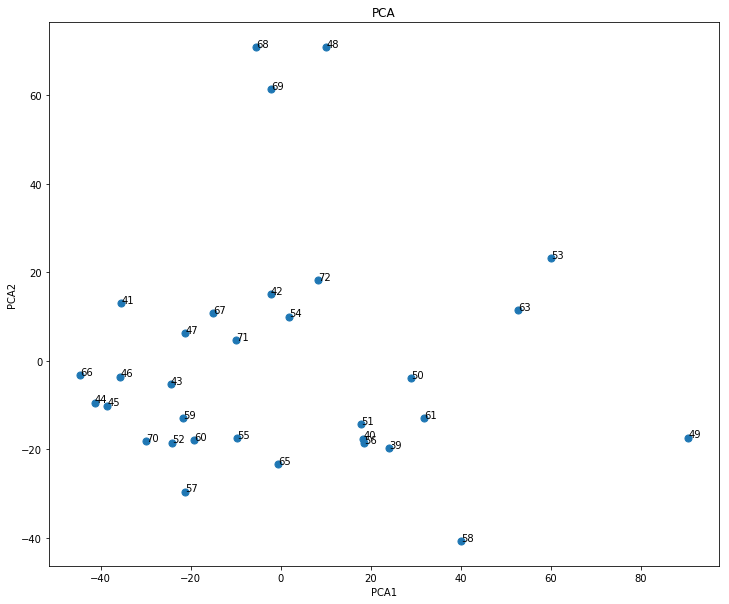

In [28]:
X = skd.PCA(n_components=2).fit_transform(df_test_norm.loc['39':'63'])
plt.figure(figsize=(12,10))
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA')

for i, s in enumerate(df_test_norm.loc['39':'63'].index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)

Based off the silhouette plot, the best number of clusters to take is 2. After that, the score drops dramatically. Thus, when making the PCA model, there are only 2 components we should take. As a result, we are unable to actually create a 3D plot.  

When looking at the 2D PCA plot, there are significantly more outliers in the test set than the train set. There is a main cluster, with another outlier cluster above, and 4 scattered to the right.

### Run the following line before your submit your work on Canvas in both HTML and IPYNB formats:

In [58]:
print(MY_UNIQNAME)

tengdann
